In [1]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

170498071/170498071 [==============================] - 2s 0us/step


In [11]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 4
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               4194816   
                                                      

In [12]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/4
1563/1563 [==============================] - 160s 102ms/step - loss: 1.7035 - accuracy: 0.3845 - val_loss: 1.4262 - val_accuracy: 0.4916
Epoch 2/4
1563/1563 [==============================] - 156s 100ms/step - loss: 1.4223 - accuracy: 0.4896 - val_loss: 1.3387 - val_accuracy: 0.5203
Epoch 3/4
1563/1563 [==============================] - 157s 100ms/step - loss: 1.3352 - accuracy: 0.5252 - val_loss: 1.2765 - val_accuracy: 0.5411
Epoch 4/4
1563/1563 [==============================] - 152s 98ms/step - loss: 1.2771 - accuracy: 0.5434 - val_loss: 1.2379 - val_accuracy: 0.5619
Accuracy: 56.19%


In [14]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dropout(0.2))
model_1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model_1.add(Dropout(0.2))
model_1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model_1.add(Dropout(0.2))
model_1.add(Dense(num_classes, activation='softmax'))

epochs = 4
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model_1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model_1.summary())
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores_1[1]*100))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_20 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_21 (Dropout)        (None, 16, 16, 64)        0         
                                                      

In [15]:
# Predict the first 4 images of the test data
predictions = model_1.predict(X_test[:4])
# Convert the predictions to class labels
predicted_labels = numpy.argmax(predictions, axis=1)
# Convert the actual labels to class labels
actual_labels = numpy.argmax(y_test[:4], axis=1)

# Print the predicted and actual labels for the first 4 images
print("Predicted labels:", predicted_labels)
print("Actual labels:   ", actual_labels)

1/1 [==============================] - 0s 117ms/step
Predicted labels: [3 8 8 8]
Actual labels:    [3 8 8 0]


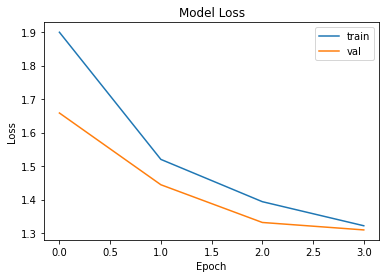

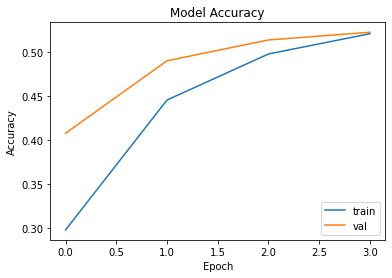

In [16]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()